In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [15]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(y_train[:5])

[1 0 0 1 0]


In [5]:
max(len(seq) for seq in X_train), sum(map(len, X_train)) / len(X_train)

(2494, 238.71364)

In [17]:
max(max(seq) for seq in X_train)

88586

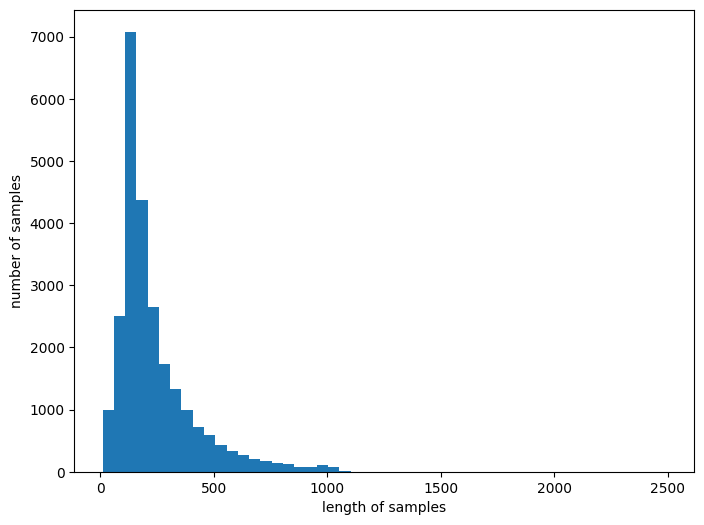

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(list(map(len, X_train)), bins=50)
plt.xlabel('length of samples'), plt.ylabel('number of samples')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
max_words = 100
max_len_contents = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    num_words=max_words
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [9]:
len(X_train[0]), y_train[:5]

(218, array([1, 0, 0, 1, 0]))

In [10]:
X_train = pad_sequences(X_train, maxlen=max_len_contents)
X_test = pad_sequences(X_test, maxlen=max_len_contents)

In [11]:
model = Sequential([
    Embedding(max_words, 64, input_length=max_len_contents),
    LSTM(100),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          6400      
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 72501 (283.21 KB)
Trainable params: 72501 (283.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

model_path = 'best-imdb-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=0,
    callbacks=[mc, es]
)


Epoch 1: val_loss improved from inf to 0.60502, saving model to best-imdb-v1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.60502 to 0.56488, saving model to best-imdb-v1.h5

Epoch 3: val_loss did not improve from 0.56488

Epoch 4: val_loss improved from 0.56488 to 0.54392, saving model to best-imdb-v1.h5

Epoch 5: val_loss did not improve from 0.54392

Epoch 6: val_loss improved from 0.54392 to 0.53573, saving model to best-imdb-v1.h5

Epoch 7: val_loss improved from 0.53573 to 0.53403, saving model to best-imdb-v1.h5

Epoch 8: val_loss did not improve from 0.53403

Epoch 9: val_loss improved from 0.53403 to 0.53268, saving model to best-imdb-v1.h5

Epoch 10: val_loss did not improve from 0.53268

Epoch 11: val_loss improved from 0.53268 to 0.53033, saving model to best-imdb-v1.h5

Epoch 12: val_loss did not improve from 0.53033

Epoch 13: val_loss did not improve from 0.53033

Epoch 14: val_loss improved from 0.53033 to 0.52353, saving model to best-imdb-v1.h5

Epoch 15: val_loss did not improve from 0.52353

Epoch 16: val_loss did not improve from 0.52353

Epoch 17: val

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

782/782 [==============================] - 12s 14ms/step - loss: 0.4993 - accuracy: 0.7545


[0.4992722272872925, 0.7544800043106079]

In [18]:
max_words = 200
max_len_contents = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    num_words=max_words
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [20]:
X_train = pad_sequences(X_train, maxlen=max_len_contents)
X_test = pad_sequences(X_test, maxlen=max_len_contents)

model2 = Sequential([
    Embedding(max_words, 64, input_length=max_len_contents),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

model2.compile('adam', 'binary_crossentropy', ['accuracy'])

model_path = 'best-imdb-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

hist2 = model2.fit(
    X_train, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=0,
    callbacks=[mc, es]
)


Epoch 1: val_loss improved from inf to 0.64678, saving model to best-imdb-v2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.64678 to 0.56092, saving model to best-imdb-v2.h5

Epoch 3: val_loss did not improve from 0.56092

Epoch 4: val_loss improved from 0.56092 to 0.55785, saving model to best-imdb-v2.h5

Epoch 5: val_loss improved from 0.55785 to 0.54809, saving model to best-imdb-v2.h5

Epoch 6: val_loss improved from 0.54809 to 0.54335, saving model to best-imdb-v2.h5

Epoch 7: val_loss improved from 0.54335 to 0.51535, saving model to best-imdb-v2.h5

Epoch 8: val_loss improved from 0.51535 to 0.51204, saving model to best-imdb-v2.h5

Epoch 9: val_loss did not improve from 0.51204

Epoch 10: val_loss improved from 0.51204 to 0.50443, saving model to best-imdb-v2.h5

Epoch 11: val_loss improved from 0.50443 to 0.49922, saving model to best-imdb-v2.h5

Epoch 12: val_loss improved from 0.49922 to 0.49919, saving model to best-imdb-v2.h5

Epoch 13: val_loss improved from 0.49919 to 0.48846, saving model to best-imdb-v2.h5

Epoch 14: val_loss did not improve from 0.48846



In [21]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

782/782 [==============================] - 21s 26ms/step - loss: 0.4706 - accuracy: 0.7740


[0.4706028997898102, 0.7739599943161011]

In [22]:
import pandas as pd
df = pd.DataFrame({
    '단어수' : [100, 200],
    '최대 문장 길이' : [1000, 2000],
    '임베딩수' : [64, 64],
    'LSTM' : [100, 100],
    '정확도' : [0.7545, 0.7740]
})
df

,단어수,최대 문장 길이,임베딩수,LSTM,정확도
0,100,1000,64,100,0.7545
1,200,2000,64,100,0.7740
